# Data Prep

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
! ls gdrive/MyDrive

 2293815-20241107133332-CADD.pdf  'Colab Notebooks'    Testimage.jpg
'Academic-CV (2).gdoc'		  'Coursework IDTA'    traffic.zip
'Application Materials'		   flower_photos.zip  'university selection.gsheet'


In [4]:
!unzip gdrive/MyDrive/traffic.zip

Archive:  gdrive/MyDrive/traffic.zip
   creating: traffic/
   creating: traffic/Red/
  inflating: traffic/Red/000803.jpg  
  inflating: traffic/Red/000806.jpg  
  inflating: traffic/Red/000856.jpg  
  inflating: traffic/Red/000865.jpg  
  inflating: traffic/Red/000867.jpg  
  inflating: traffic/Red/000873.jpg  
  inflating: traffic/Red/000878.jpg  
  inflating: traffic/Red/000879.jpg  
  inflating: traffic/Red/000882.jpg  
  inflating: traffic/Red/000892.jpg  
  inflating: traffic/Red/000896.jpg  
  inflating: traffic/Red/000903.jpg  
  inflating: traffic/Red/000905.jpg  
  inflating: traffic/Red/000911.jpg  
  inflating: traffic/Red/000916.jpg  
  inflating: traffic/Red/000920.jpg  
  inflating: traffic/Red/000928.jpg  
  inflating: traffic/Red/000951.jpg  
  inflating: traffic/Red/002579.jpg  
  inflating: traffic/Red/000000.jpg  
  inflating: traffic/Red/000001.jpg  
  inflating: traffic/Red/000002.jpg  
  inflating: traffic/Red/000008.jpg  
  inflating: traffic/Red/000014.jpg  
  i

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [7]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [8]:
X=[]
Z=[]
IMG_SIZE=150
TRAFFIC_GREEN_DIR='/content/traffic/Green'
TRAFFIC_RED_DIR='/content/traffic/Red'


In [9]:
def assign_label(img, traffic_type):
  return traffic_type


In [10]:
def make_train_data(traffic_type,DIR):
    for img in os.listdir(DIR):
        print('print DIR:',DIR)
        #print('print listdir :',os.listdir(DIR))
        label=assign_label(img,traffic_type)
        path = os.path.join(DIR,img)
        print(path)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [11]:
make_train_data('Green',TRAFFIC_GREEN_DIR)


print DIR: /content/traffic/Green
/content/traffic/Green/000100.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000180.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000197.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000320.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000321.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000548.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000597.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000007.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000381.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000115.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000332.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000116.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000446.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000579.jpg
print DIR: /content/traffic/Green
/content/traff

In [12]:
make_train_data('Red',TRAFFIC_RED_DIR)

print DIR: /content/traffic/Red
/content/traffic/Red/001050.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000201.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/002128.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/002815.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000882.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/001005.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000403.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000354.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000008.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/001157.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000566.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000328.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/001979.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/001497.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000928.jpg
print DIR: /content/traffic/Red
/content

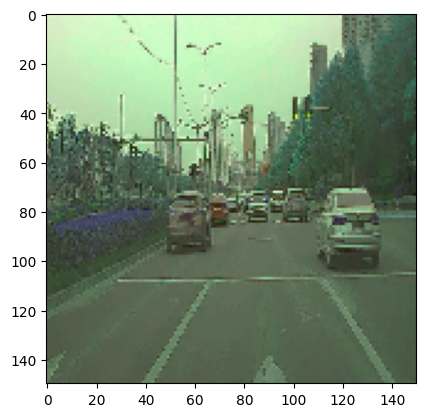

In [13]:
plt.imshow(X[1])

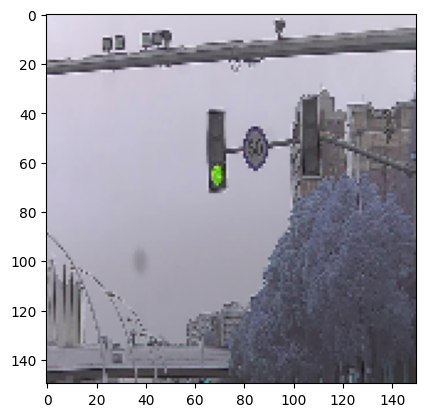

In [14]:
plt.imshow(X[30])

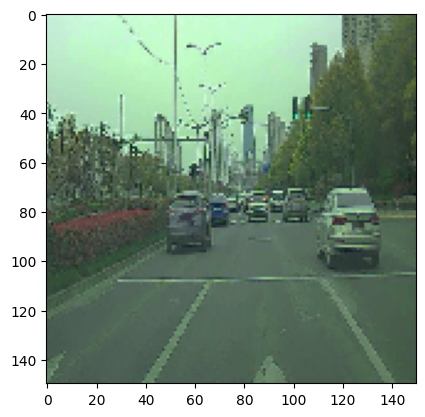

In [15]:
plt.imshow(X[1][:,:,::-1])

In [16]:
le=LabelEncoder()
print(Z)
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
X=X/255

['Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', '

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
x_train.shape
x_test.shape

(40, 150, 150, 3)

# Conv2d

In [19]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(32, 2, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(96, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation = "sigmoid")
])

In [20]:
model.compile(optimizer='Adam',loss='CategoricalCrossentropy',metrics=['accuracy'])
#model.compile(optimizer='Adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 37, 37, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 18, 18, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       5,308,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,559,874 (21.21 MB)

 Trainable params: 5,559,874 (21.21 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
History = model.fit(x_train,y_train,  epochs = 50, validation_split=0.1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5132 - loss: 1.2888 - val_accuracy: 0.4375 - val_loss: 0.6964
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4507 - loss: 0.6957 - val_accuracy: 0.5625 - val_loss: 0.6916
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4696 - loss: 0.6931 - val_accuracy: 0.5625 - val_loss: 0.6864
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5239 - loss: 0.6954 - val_accuracy: 0.5625 - val_loss: 0.6880
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5382 - loss: 0.6896 - val_accuracy: 0.5625 - val_loss: 0.6917
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5771 - loss: 0.6915 - val_accuracy: 0.4375 - val_loss: 0.6935
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5087 - loss: 0.6929 - val_accuracy: 0.4375 - val_loss: 0.6943
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4618 - loss: 0.6937 - val_accuracy: 0.4375 - val_loss: 0.6936
Epoch 9/50


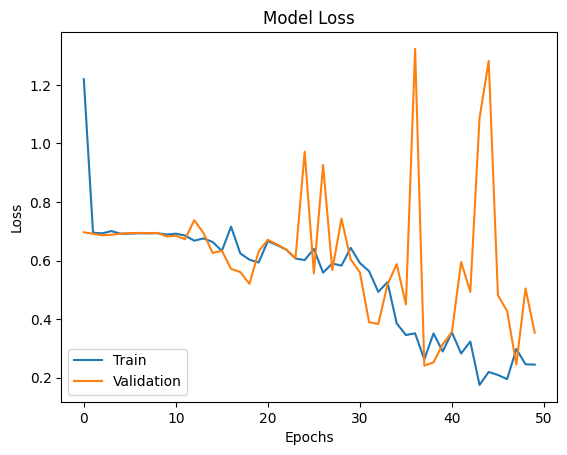

In [23]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

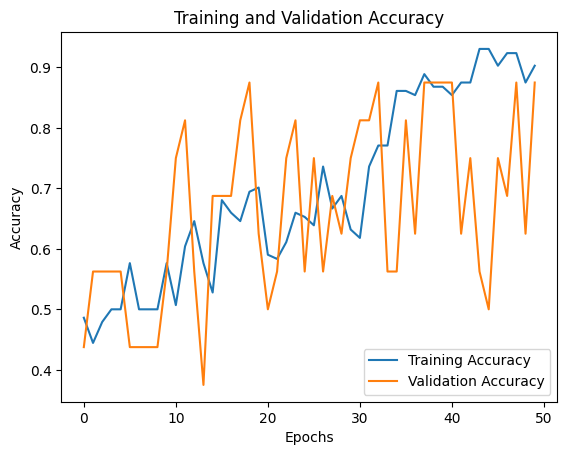

In [24]:
plt.plot(History.history['accuracy'],label='Training Accuracy')
plt.plot(History.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Check the shape of x_test to ensure it contains the test data
print(f"x_test shape: {x_test.shape}")

# Randomly select 5 indices from the test set
random_indices = random.sample(range(x_test.shape[0]), 5)
print(random_indices)

x_test shape: (40, 150, 150, 3)
[29, 28, 10, 11, 18]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.5604 - loss: 0.7059
[0.7076791524887085, 0.574999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
predicted label is  1


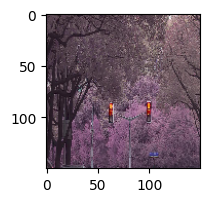

In [28]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =29
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.5604 - loss: 0.7059
[0.7076791524887085, 0.574999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
predicted label is  1


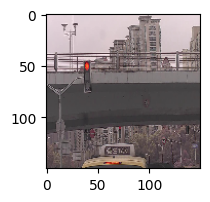

In [29]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =28
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5604 - loss: 0.7059
[0.7076791524887085, 0.574999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
predicted label is  1


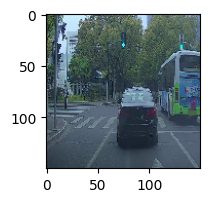

In [30]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =10
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5604 - loss: 0.7059
[0.7076791524887085, 0.574999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
predicted label is  1


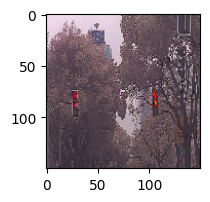

In [31]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =11
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.5604 - loss: 0.7059
[0.7076791524887085, 0.574999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
predicted label is  1


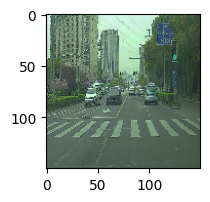

In [32]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =18
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction probabilities: [[0.38205197 0.7041285 ]]
Predicted class: [1]


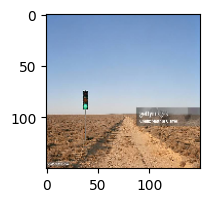

In [33]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path to the new image
new_image_path = '/content/gdrive/MyDrive/Testimage.jpg'

# Load and preprocess the image
img = load_img(new_image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict using the model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=-1)

# Output the result
plt.figure(figsize=(2,2))
plt.imshow(img)
print("Prediction probabilities:", prediction)
print("Predicted class:", predicted_class)


# Data Prep again

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! ls gdrive/MyDrive

 2293815-20241107133332-CADD.pdf  'Colab Notebooks'    Testimage.jpg
'Academic-CV (2).gdoc'		  'Coursework IDTA'    traffic.zip
'Application Materials'		   flower_photos.zip  'university selection.gsheet'


In [ ]:
!unzip gdrive/MyDrive/traffic.zip

Archive:  gdrive/MyDrive/traffic.zip
   creating: traffic/
   creating: traffic/Red/
  inflating: traffic/Red/000803.jpg  
  inflating: traffic/Red/000806.jpg  
  inflating: traffic/Red/000856.jpg  
  inflating: traffic/Red/000865.jpg  
  inflating: traffic/Red/000867.jpg  
  inflating: traffic/Red/000873.jpg  
  inflating: traffic/Red/000878.jpg  
  inflating: traffic/Red/000879.jpg  
  inflating: traffic/Red/000882.jpg  
  inflating: traffic/Red/000892.jpg  
  inflating: traffic/Red/000896.jpg  
  inflating: traffic/Red/000903.jpg  
  inflating: traffic/Red/000905.jpg  
  inflating: traffic/Red/000911.jpg  
  inflating: traffic/Red/000916.jpg  
  inflating: traffic/Red/000920.jpg  
  inflating: traffic/Red/000928.jpg  
  inflating: traffic/Red/000951.jpg  
  inflating: traffic/Red/002579.jpg  
  inflating: traffic/Red/000000.jpg  
  inflating: traffic/Red/000001.jpg  
  inflating: traffic/Red/000002.jpg  
  inflating: traffic/Red/000008.jpg  
  inflating: traffic/Red/000014.jpg  
  i

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [ ]:
X=[]
Z=[]
IMG_SIZE=150
TRAFFIC_GREEN_DIR='/content/traffic/Green'
TRAFFIC_RED_DIR='/content/traffic/Red'


In [ ]:
def assign_label(img, traffic_type):
  return traffic_type


In [ ]:
def make_train_data(traffic_type,DIR):
    for img in os.listdir(DIR):
        print('print DIR:',DIR)
        #print('print listdir :',os.listdir(DIR))
        label=assign_label(img,traffic_type)
        path = os.path.join(DIR,img)
        print(path)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Green',TRAFFIC_GREEN_DIR)


print DIR: /content/traffic/Green
/content/traffic/Green/000100.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000180.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000197.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000320.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000321.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000548.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000597.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000007.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000381.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000115.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000332.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000116.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000446.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000579.jpg
print DIR: /content/traffic/Green
/content/traff

In [ ]:
make_train_data('Red',TRAFFIC_RED_DIR)

print DIR: /content/traffic/Red
/content/traffic/Red/001050.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000201.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/002128.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/002815.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000882.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/001005.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000403.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000354.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000008.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/001157.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000566.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000328.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/001979.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/001497.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000928.jpg
print DIR: /content/traffic/Red
/content

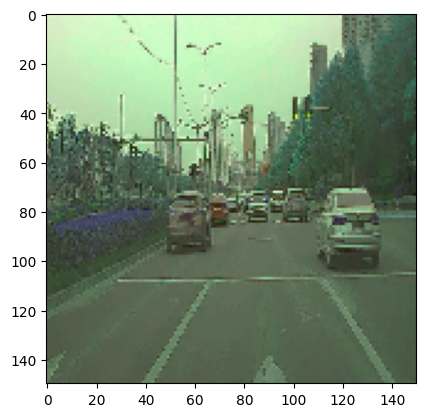

In [ ]:
plt.imshow(X[1])

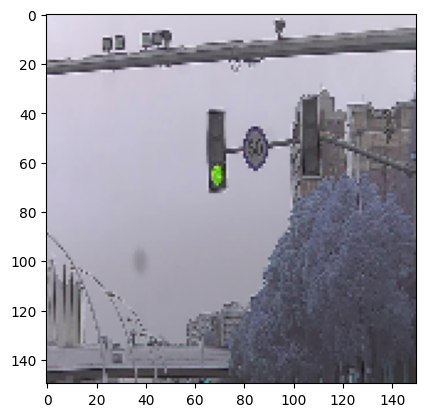

In [ ]:
plt.imshow(X[30])

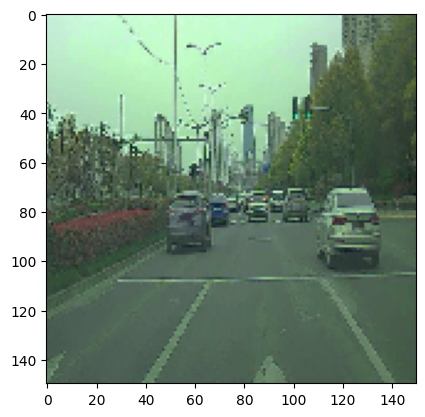

In [ ]:
plt.imshow(X[1][:,:,::-1])

In [ ]:
le=LabelEncoder()
print(Z)
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
X=X/255

['Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', '

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
x_train.shape
x_test.shape

(40, 150, 150, 3)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Conv2d with augmentation first

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(32, 2, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(96, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation = "sigmoid")
])

In [ ]:
model.compile(optimizer='Adam',loss='CategoricalCrossentropy',metrics=['accuracy'])
#model.compile(optimizer='Adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       5,308,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,559,874 (21.21 MB)

 Trainable params: 5,559,874 (21.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
History = model.fit(x_train,y_train,  epochs = 50, validation_split=0.1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4920 - loss: 0.7927 - val_accuracy: 0.4375 - val_loss: 0.6960
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4197 - loss: 0.7000 - val_accuracy: 0.4375 - val_loss: 0.6951
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5022 - loss: 0.6938 - val_accuracy: 0.5625 - val_loss: 0.6900
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5097 - loss: 0.6913 - val_accuracy: 0.3750 - val_loss: 0.6938
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4651 - loss: 0.6929 - val_accuracy: 0.4375 - val_loss: 0.6916
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5314 - loss: 0.6916 - val_accuracy: 0.4375 - val_loss: 0.6968
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4789 - loss: 0.6928 - val_accuracy: 0.3750 - val_loss: 0.6920
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5101 - loss: 0.6877 - val_accuracy: 0.4375 - val_loss: 0.6874
Epoch 9/5

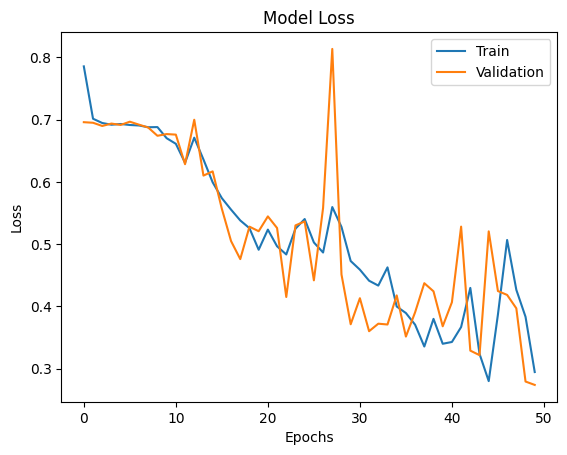

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

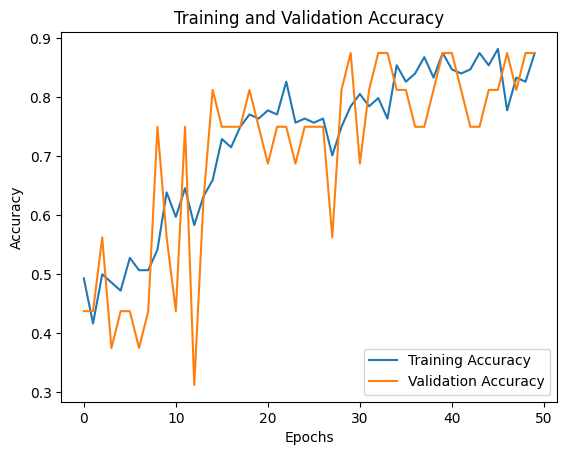

In [ ]:
plt.plot(History.history['accuracy'],label='Training Accuracy')
plt.plot(History.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

#Checking the shape of x_test to ensure it contains the test data
print(f"x_test shape: {x_test.shape}")

#Randomly select 5 indices from the test set
random_indices = random.sample(range(x_test.shape[0]), 5)
print(random_indices)


x_test shape: (40, 150, 150, 3)
[20, 37, 15, 14, 27]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.8417 - loss: 0.4817
[0.5117999911308289, 0.824999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
predicted label is  1


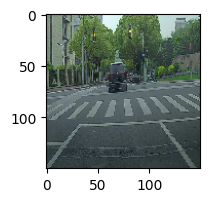

In [ ]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =20
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.8417 - loss: 0.4817
[0.5117999911308289, 0.824999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
predicted label is  1


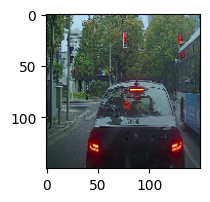

In [ ]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =37
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.8417 - loss: 0.4817
[0.5117999911308289, 0.824999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
predicted label is  1


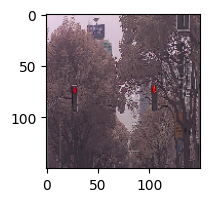

In [ ]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =15
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.8417 - loss: 0.4817
[0.5117999911308289, 0.824999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
predicted label is  1


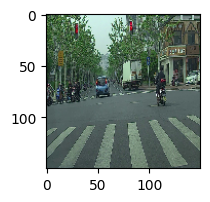

In [ ]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =14
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.8417 - loss: 0.4817
[0.5117999911308289, 0.824999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
predicted label is  0


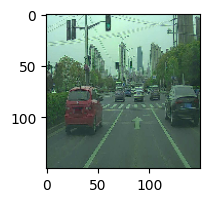

In [ ]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =27
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction probabilities: [[0.58087844 0.39661133]]
Predicted class: [0]


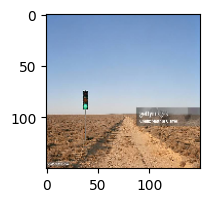

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path to the new image
new_image_path = '/content/gdrive/MyDrive/Testimage.jpg'

# Load and preprocess the image
img = load_img(new_image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict using the model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=-1)

# Output the result
plt.figure(figsize=(2,2))
plt.imshow(img)
print("Prediction probabilities:", prediction)
print("Predicted class:", predicted_class)


# Data Prep for VGG

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
! ls gdrive/MyDrive

 2293815-20241107133332-CADD.pdf   flower_photos.zip   Testimage.jpg
'Academic-CV (2).gdoc'		   Testimage2.jpg      traffic.zip
'Application Materials'		   Testimage3.jpg     'university selection.gsheet'
'Colab Notebooks'		   Testimage4.jpg
'Coursework IDTA'		   Testimage5.jpg


In [ ]:
!unzip gdrive/MyDrive/traffic.zip

Archive:  gdrive/MyDrive/traffic.zip
   creating: traffic/
   creating: traffic/Red/
  inflating: traffic/Red/000803.jpg  
  inflating: traffic/Red/000806.jpg  
  inflating: traffic/Red/000856.jpg  
  inflating: traffic/Red/000865.jpg  
  inflating: traffic/Red/000867.jpg  
  inflating: traffic/Red/000873.jpg  
  inflating: traffic/Red/000878.jpg  
  inflating: traffic/Red/000879.jpg  
  inflating: traffic/Red/000882.jpg  
  inflating: traffic/Red/000892.jpg  
  inflating: traffic/Red/000896.jpg  
  inflating: traffic/Red/000903.jpg  
  inflating: traffic/Red/000905.jpg  
  inflating: traffic/Red/000911.jpg  
  inflating: traffic/Red/000916.jpg  
  inflating: traffic/Red/000920.jpg  
  inflating: traffic/Red/000928.jpg  
  inflating: traffic/Red/000951.jpg  
  inflating: traffic/Red/002579.jpg  
  inflating: traffic/Red/000000.jpg  
  inflating: traffic/Red/000001.jpg  
  inflating: traffic/Red/000002.jpg  
  inflating: traffic/Red/000008.jpg  
  inflating: traffic/Red/000014.jpg  
  i

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [ ]:
X=[]
Z=[]
IMG_SIZE=224
TRAFFIC_GREEN_DIR='/content/traffic/Green'
TRAFFIC_RED_DIR='/content/traffic/Red'


In [ ]:
def assign_label(img, traffic_type):
  return traffic_type


In [ ]:
def make_train_data(traffic_type,DIR):
    for img in os.listdir(DIR):
        print('print DIR:',DIR)
        #print('print listdir :',os.listdir(DIR))
        label=assign_label(img,traffic_type)
        path = os.path.join(DIR,img)
        print(path)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Green',TRAFFIC_GREEN_DIR)


print DIR: /content/traffic/Green
/content/traffic/Green/000015.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000406.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000364.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000049.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000105.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000165.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000182.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000196.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000485.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000449.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000597.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000431.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000391.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000162.jpg
print DIR: /content/traffic/Green
/content/traff

In [ ]:
make_train_data('Red',TRAFFIC_RED_DIR)

print DIR: /content/traffic/Red
/content/traffic/Red/000102.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000928.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000865.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000903.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000037.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000167.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000570.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000370.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000421.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000505.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000920.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/001742.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000354.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000806.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000800.jpg
print DIR: /content/traffic/Red
/content

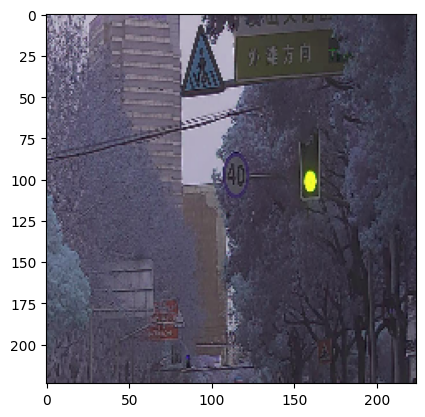

In [ ]:
plt.imshow(X[1])

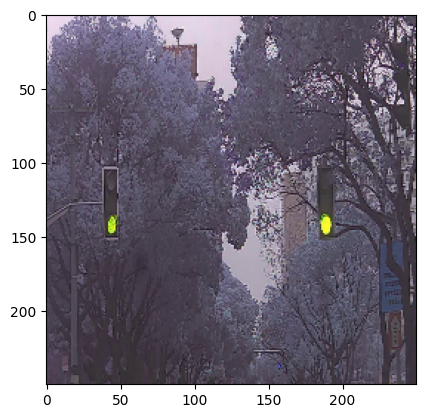

In [ ]:
plt.imshow(X[30])

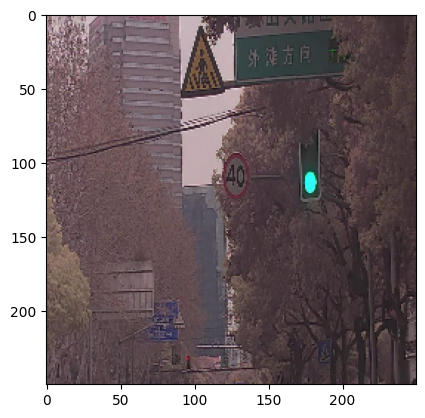

In [ ]:
plt.imshow(X[1][:,:,::-1])

In [ ]:
le=LabelEncoder()
print(Z)
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
X=X/255

['Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', '

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
x_train.shape
x_test.shape

(40, 224, 224, 3)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(224,
                                  224,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# From the web prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: [0]


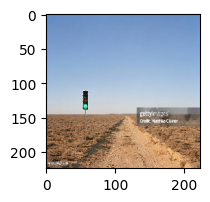

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

#Path to the new image
new_image_path = '/content/gdrive/MyDrive/Testimage.jpg'

#preprocessing the image
img = load_img(new_image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#prediction
prediction = model_vgg.predict(img_array)
predicted_class = np.argmax(prediction, axis=-1)

plt.figure(figsize=(2,2))
plt.imshow(img)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: [1]


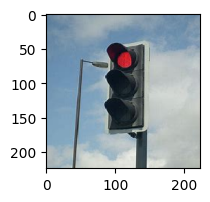

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

#Path to the new image
new_image_path = '/content/gdrive/MyDrive/Testimage2.jpg'

#preprocessing the image
img = load_img(new_image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#prediction
prediction = model_vgg.predict(img_array)
predicted_class = np.argmax(prediction, axis=-1)

plt.figure(figsize=(2,2))
plt.imshow(img)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: [0]


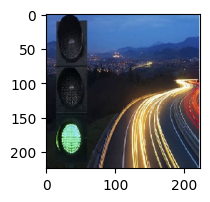

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

#Path to the new image
new_image_path = '/content/gdrive/MyDrive/Testimage3.jpg'

#preprocessing the image
img = load_img(new_image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#prediction
prediction = model_vgg.predict(img_array)
predicted_class = np.argmax(prediction, axis=-1)

plt.figure(figsize=(2,2))
plt.imshow(img)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class: [1]


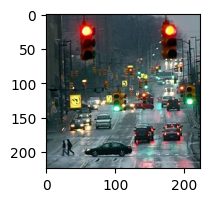

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

#Path to the new image
new_image_path = '/content/gdrive/MyDrive/Testimage4.jpg'

#preprocessing the image
img = load_img(new_image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#prediction
prediction = model_vgg.predict(img_array)
predicted_class = np.argmax(prediction, axis=-1)

plt.figure(figsize=(2,2))
plt.imshow(img)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: [0]


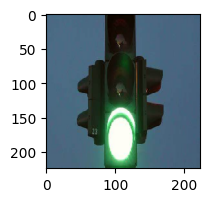

In [ ]:


#Path to the new image
new_image_path = '/content/gdrive/MyDrive/Testimage5.jpg'

#preprocessing the image
img = load_img(new_image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#prediction
prediction = model_vgg.predict(img_array)
predicted_class = np.argmax(prediction, axis=-1)

plt.figure(figsize=(2,2))
plt.imshow(img)
print("Predicted class:", predicted_class)